# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [ ]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [26]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(*) 
    FROM products 
    WHERE price < 10;
""")


rows = cursor.fetchall()
print(rows)





[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [27]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNTRY,
            COUNT (COUNTRY) as numberofsuppliers
            FROM suppliers
            GROUP BY COUNTRY 
            ORDER BY numberofsuppliers DESC
               
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)


[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


        Country  Frequency
0           USA         13
1       Germany         11
2        France         11
3        Brazil          9
4            UK          7
5         Spain          5
6        Mexico          5
7     Venezuela          4
8         Italy          3
9        Canada          3
10    Argentina          3
11  Switzerland          2
12       Sweden          2
13     Portugal          2
14      Finland          2
15      Denmark          2
16      Belgium          2
17      Austria          2
18       Poland          1
19       Norway          1
20      Ireland          1


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_7229/1954740418.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Country', data=df, palette='viridis')


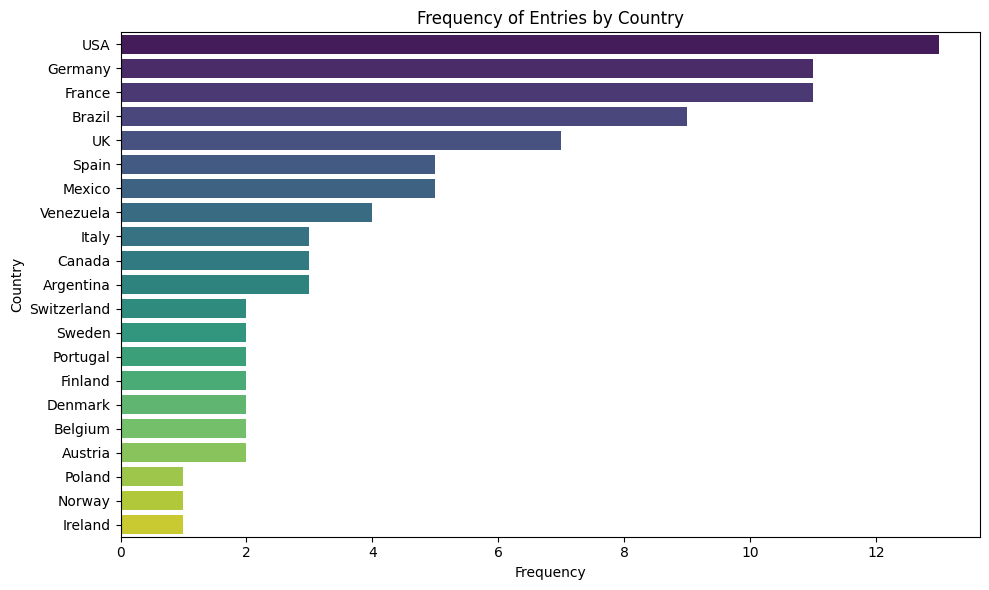

In [23]:
# TODO: Convert your list of tuples to a dataframe
data = [('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]

df = pd.DataFrame(rows, columns=['Country', 'Frequency'])
print(df)

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Country', data=df, palette='viridis')
plt.title('Frequency of Entries by Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [21]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
   SELECT Country,
       COUNT(*) AS number_of_customers
FROM Customers
GROUP BY Country
ORDER BY number_of_customers DESC;

""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_7229/455352822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Customers', y='Country', data=df, palette='mako')


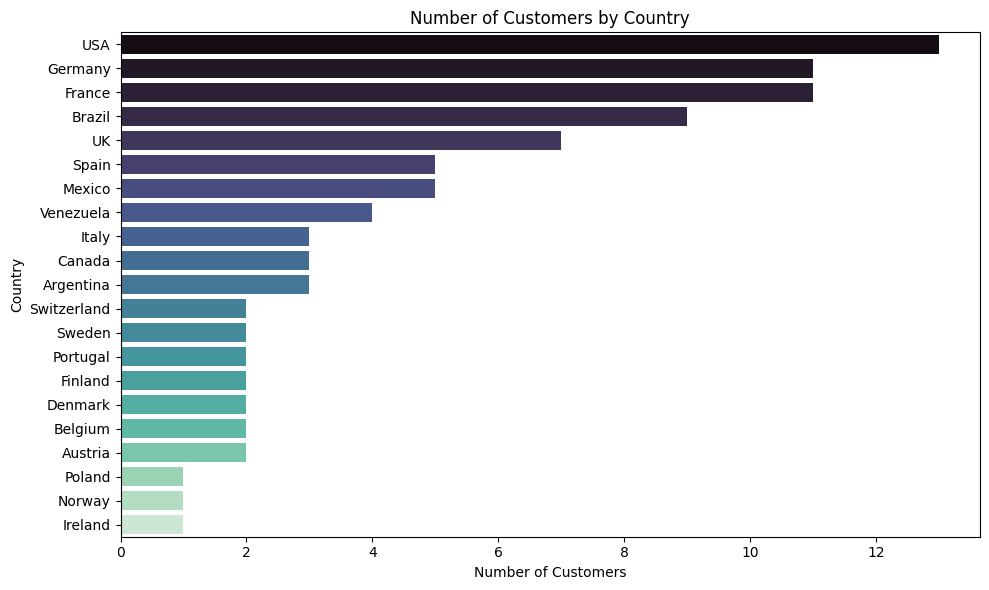

In [22]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'Number of Customers'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Customers', y='Country', data=df, palette='mako')
plt.title('Number of Customers by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [24]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT p.ProductName,
           SUM(od.Quantity) AS total_quantity
    FROM OrderDetails od
    JOIN Products p ON od.ProductID = p.ProductID
    GROUP BY p.ProductName
    ORDER BY total_quantity ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)


[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_7229/4067807884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Quantity', y='ProductName', data=df, palette='rocket')


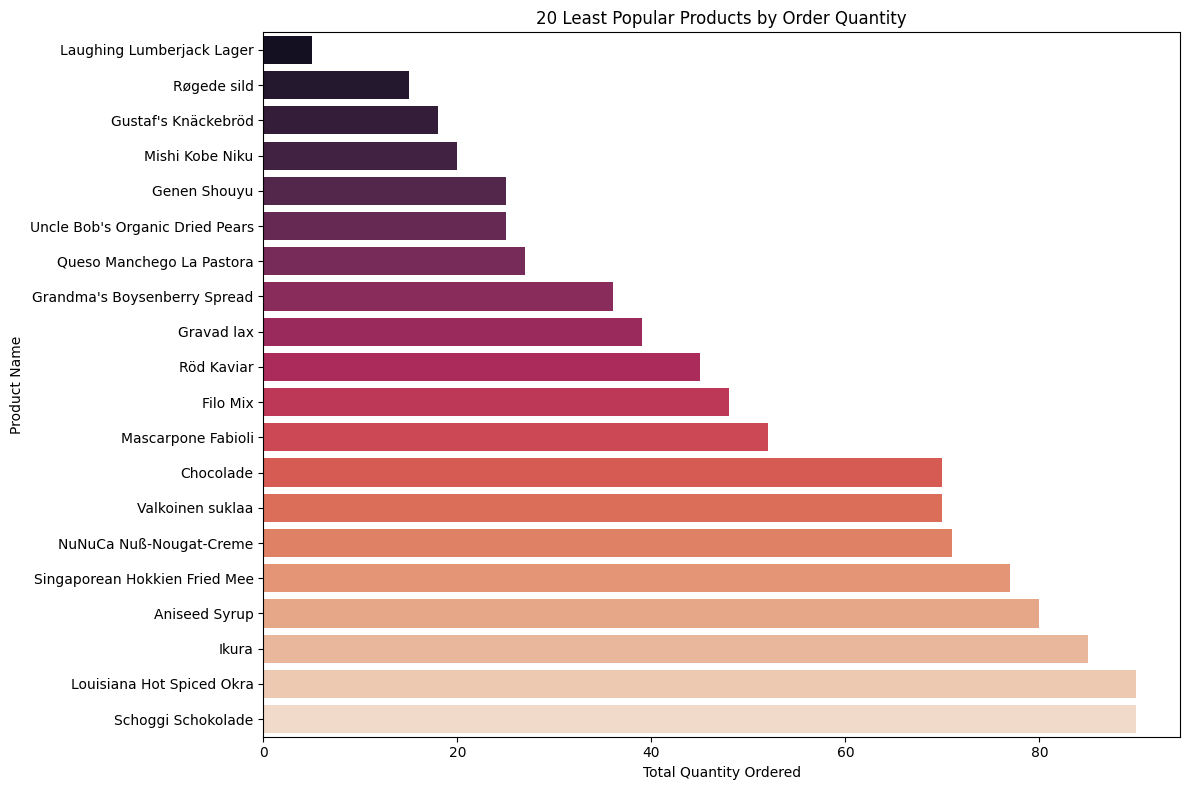

In [25]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'Total Quantity'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Quantity', y='ProductName', data=df, palette='rocket')
plt.title('20 Least Popular Products by Order Quantity')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[The USA had the greatest number of customer according to the data and chart. More customers leads to more suppliers because its about demand with the US in the lead with the most customers followed by germany.]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[The least popular product by order quantity is laughing lumberjack lager this correlate with revenue because the demand for this product is very low which will result in poor sales for the product]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Couldnt answer this question because its for question 6 ]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[The supplier with the most orders is Schoggi Schokolade]